AIRLINES DATA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Import Airline dataset

In [4]:
Airline_df= pd.read_csv('Airlines_Data.csv')

In [5]:
Airline_df

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


check if there are missig values

In [6]:
#Airline_df.isnull().sum()

In [7]:
#print(Airline_df.dtypes)

In [8]:
# Convert 'Month' column to datetime
Airline_df['Month'] = pd.to_datetime(Airline_df['Month'], format='%b-%y')

#print(Airline_df)

In [9]:
#print(Airline_df.dtypes)

 represantation of Airline passenger data shows Passengers per year

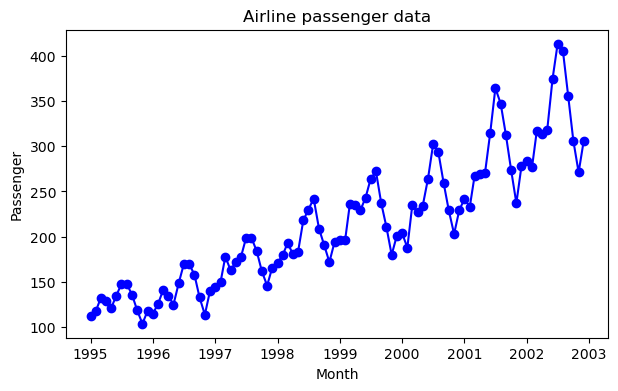

In [10]:
plt.figure(figsize=(7,4))
plt.plot(Airline_df['Month'],Airline_df['Passengers'],marker='o', color='b')
plt.title('Airline passenger data')
plt.xlabel('Month')
plt.ylabel('Passenger')
plt.show()

Lag plots help to identify any autocorrelation in the time series data.

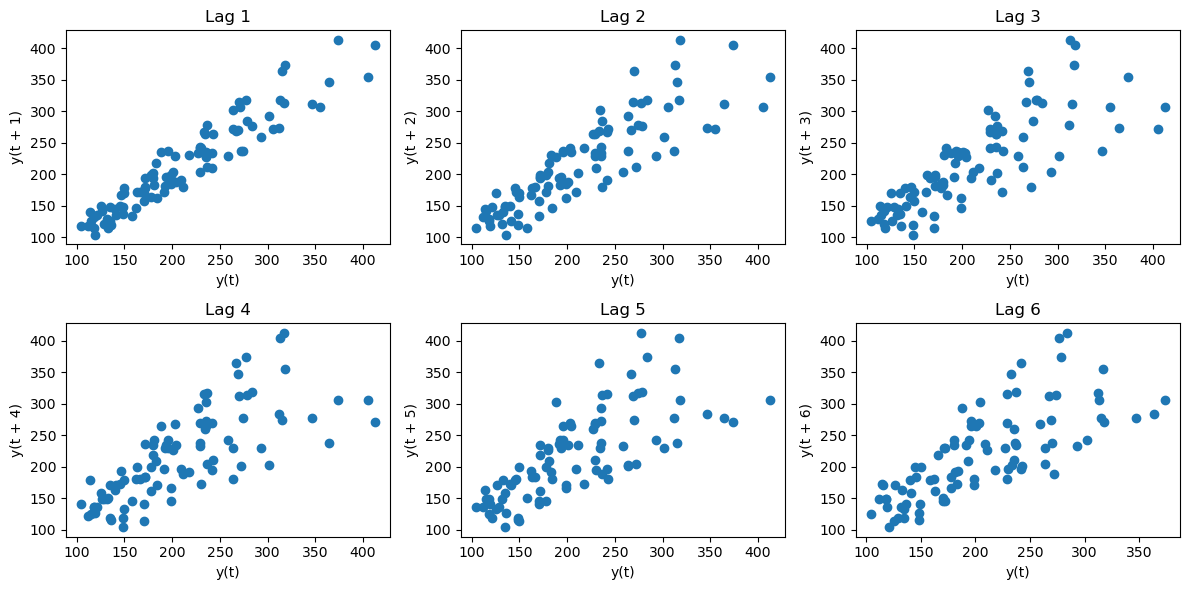

In [11]:
#Lag plots help to identify any autocorrelation in the time series data.
from pandas.plotting import lag_plot

plt.figure(figsize=(12, 6))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    lag_plot(Airline_df['Passengers'], lag=i)
    plt.title(f'Lag {i}')
plt.tight_layout()
plt.show()


The ACF plot shows the correlation of the time series with its own lagged values.


<Figure size 1200x600 with 0 Axes>

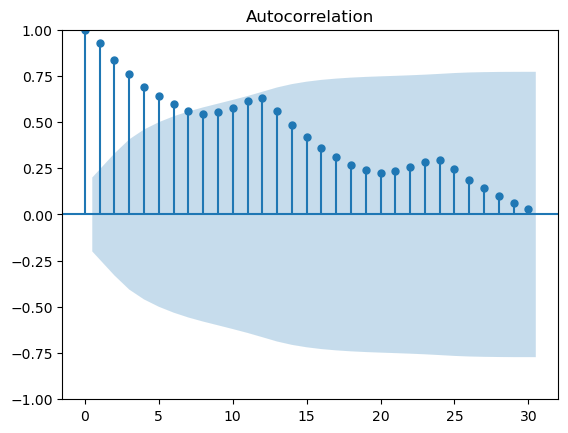

<Figure size 1200x600 with 0 Axes>

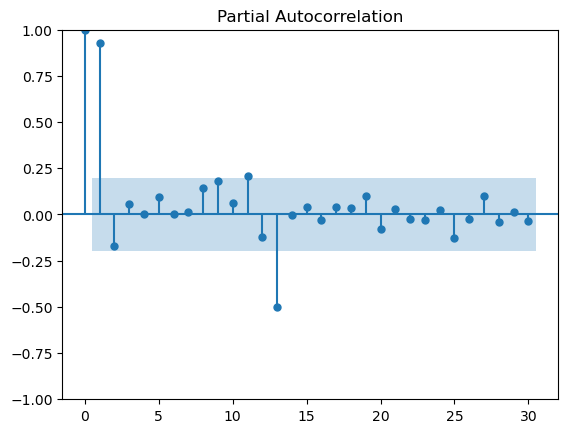

In [12]:
#The ACF plot shows the correlation of the time series with its own lagged values.
plt.figure(figsize=(12, 6))
plot_acf(Airline_df['Passengers'], lags=30)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(Airline_df['Passengers'], lags=30)
plt.show()


In [ ]:
Assess and address stationarity by checking if the time series is stationary

In [13]:
# Assess and address stationarity
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Perform ADF test
adf_test(Airline_df['Passengers'])


ADF Statistic: 1.3402479596466974
p-value: 0.9968250481137263
Critical Values:
   1%: -3.5117123057187376
   5%: -2.8970475206326833
   10%: -2.5857126912469153


In [14]:
#Making the Series Stationary
#Here's a quick recap of differencing the data to make it stationary:

# Differencing the data
Airline_df['Passengers_diff'] = Airline_df['Passengers'].diff().dropna()

# Perform ADF test on differenced data
adf_test(Airline_df['Passengers_diff'].dropna())


ADF Statistic: -2.15000173592066
p-value: 0.22488942647512306
Critical Values:
   1%: -3.512738056978279
   5%: -2.8974898650628984
   10%: -2.585948732897085


In [15]:
# Remove missing value
Airline_df['Passengers_diff'].fillna(Airline_df['Passengers_diff'].mode()[0], inplace=True)


In [16]:
# Remove missing value
#Airline_df

MODEL BUILDING:

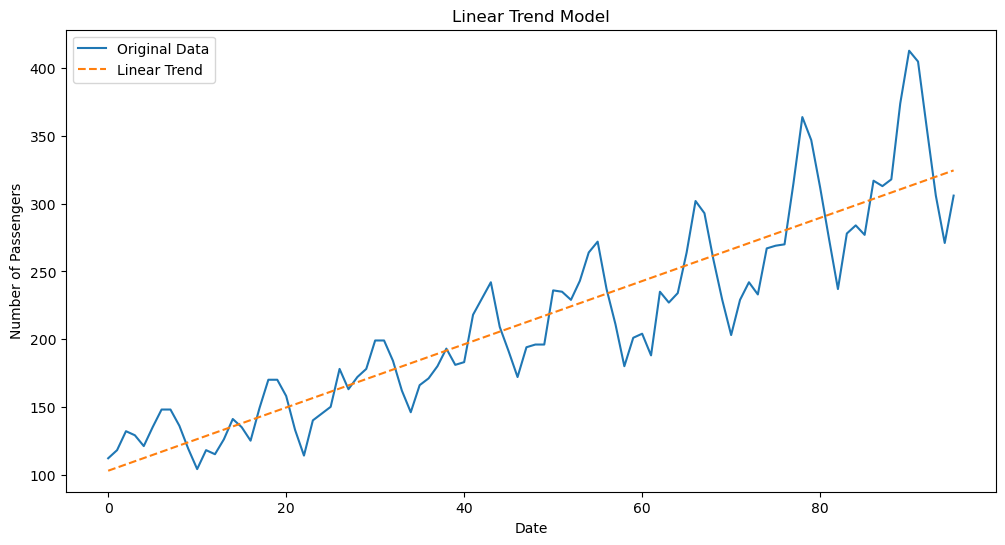

In [17]:
from sklearn.linear_model import LinearRegression

# Prepare the data
Airline_df['t'] = np.arange(len(Airline_df))
X = Airline_df[['t']]
y = Airline_df['Passengers']

# Fit the model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Make predictions
Airline_df['Linear_Trend'] = linear_model.predict(X)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(Airline_df['Passengers'], label='Original Data')
plt.plot(Airline_df['Linear_Trend'], label='Linear Trend', linestyle='--')
plt.title('Linear Trend Model')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()



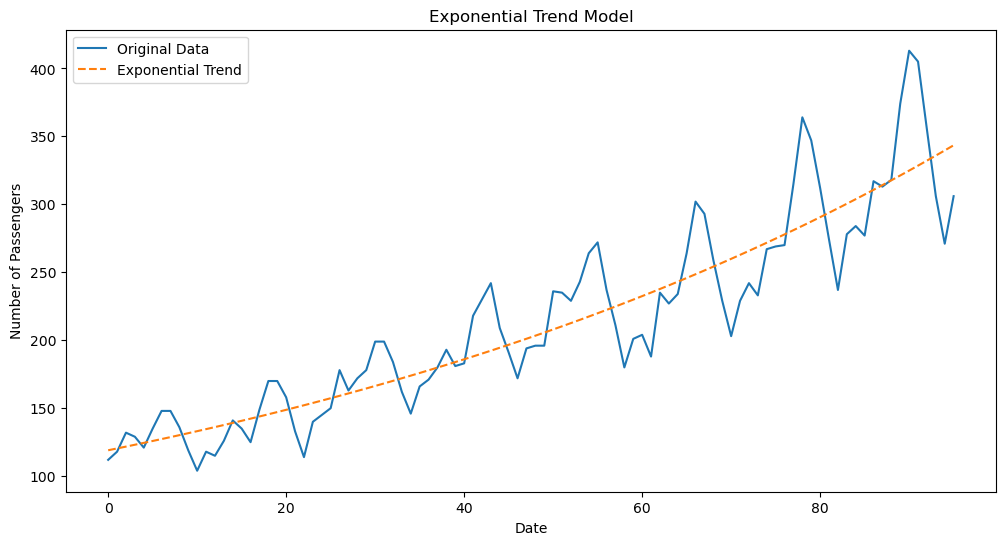

In [18]:
# Apply logarithm to passengers data
Airline_df['Log_Passengers'] = np.log(Airline_df['Passengers'])

# Fit the model on log-transformed data
linear_model.fit(X, Airline_df['Log_Passengers'])
Airline_df['Exponential_Trend'] = np.exp(linear_model.predict(X))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(Airline_df['Passengers'], label='Original Data')
plt.plot(Airline_df['Exponential_Trend'], label='Exponential Trend', linestyle='--')
plt.title('Exponential Trend Model')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


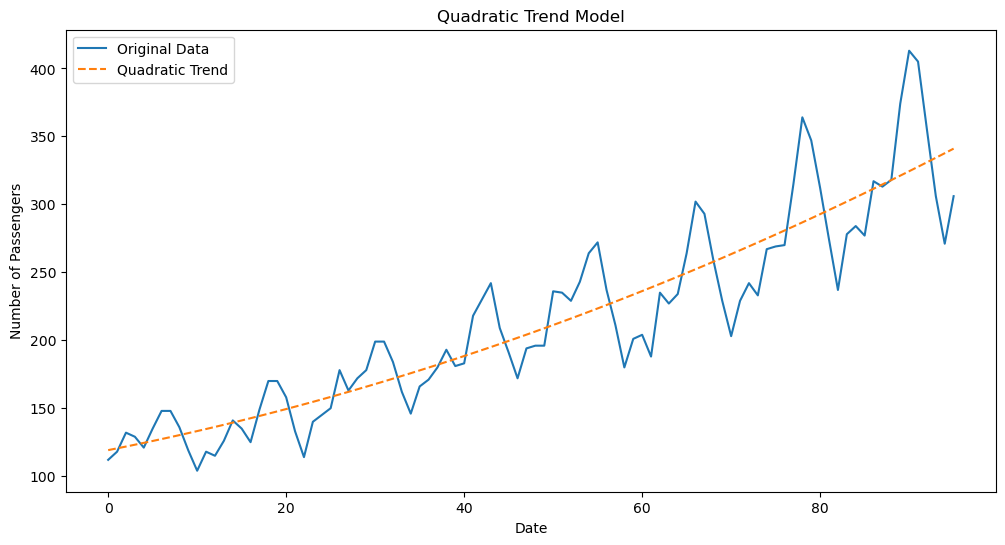

In [19]:
# Prepare the data with quadratic term
Airline_df['t_squared'] = Airline_df['t']**2
X_quad = Airline_df[['t', 't_squared']]

# Fit the model
quadratic_model = LinearRegression()
quadratic_model.fit(X_quad, y)

# Make predictions
Airline_df['Quadratic_Trend'] = quadratic_model.predict(X_quad)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(Airline_df['Passengers'], label='Original Data')
plt.plot(Airline_df['Quadratic_Trend'], label='Quadratic Trend', linestyle='--')
plt.title('Quadratic Trend Model')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


SEASONALITY MODELS

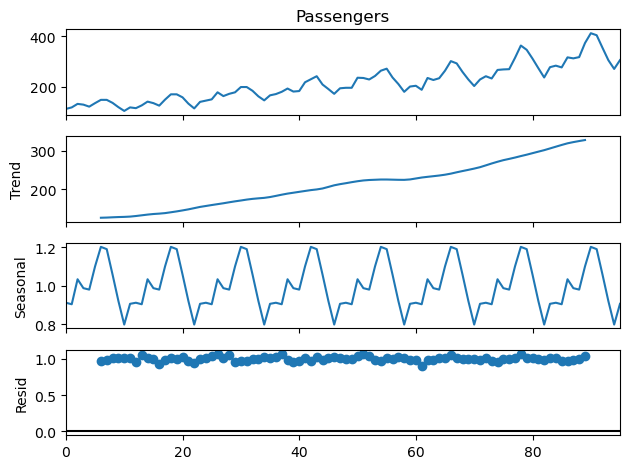

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(Airline_df['Passengers'], model='multiplicative', period=12)

# Plot the decomposed components
result.plot()
plt.show()


In [21]:
Airline_df.columns

Index(['Month', 'Passengers', 'Passengers_diff', 't', 'Linear_Trend',
       'Log_Passengers', 'Exponential_Trend', 't_squared', 'Quadratic_Trend'],
      dtype='object')

In [22]:
Airline_df.set_index('Month', inplace=True)
Airline_df['Passengers'] = pd.to_numeric(Airline_df['Passengers'], errors='coerce')
Airline_df.dropna(inplace=True)
train_size = int(len(Airline_df) * 0.8)
train, test = Airline_df[:train_size], Airline_df[train_size:]

C:\Users\USER\OneDrive\Documents\Python Scripts\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\OneDrive\Documents\Python Scripts\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Root Mean Square Error: 9.98


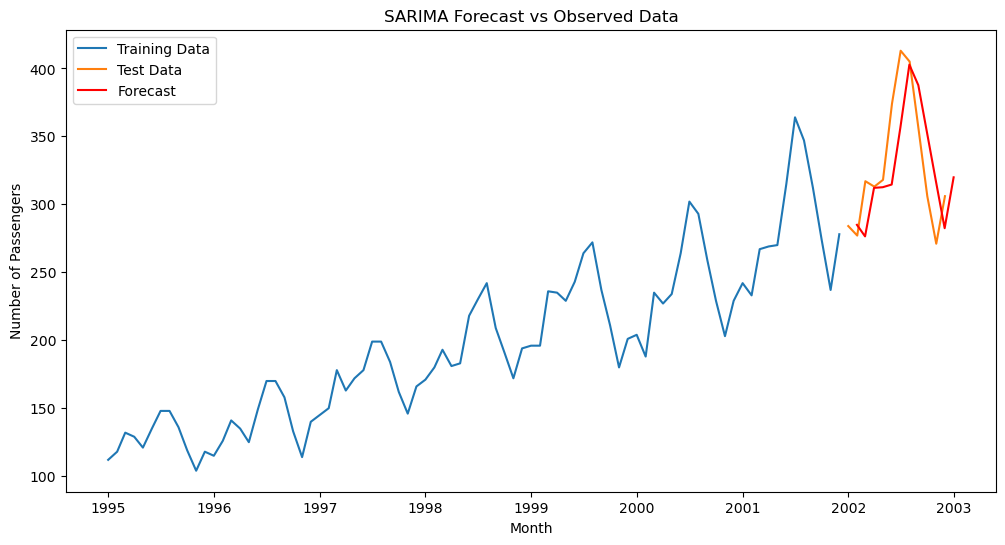

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Split the Airline_df into training and testing sets
train = Airline_df.iloc[:-12]['Passengers']
test = Airline_df.iloc[-12:]

# Fit the SARIMA model
model = SARIMAX(train, 
                order=(1, 1, 1),  # ARIMA(p,d,q) order
                seasonal_order=(1, 1, 1, 12))  # (P,D,Q,s) seasonal order
results = model.fit()

# Make predictions
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=test.index[0], periods=12, freq='M')
forecast_values = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast_values))
print(f'Root Mean Square Error: {rmse:.2f}')

# Plot observed vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test['Passengers'], label='Test Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('SARIMA Forecast vs Observed Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()




2.COCA_COLA SALES DATA

Import Cocacola sales dataset

In [ ]:
cocacola_df= pd.read_csv('CocaCola_Sales_Rawdata.csv')
#cocacola_df

In [ ]:
#print(cocacola_df.dtypes)

Check if there are missing values

In [ ]:
#cocacola_df.isnull().sum()

In [ ]:
#print(cocacola_df.dtypes)

Changing quarters  column into datetime format

In [ ]:
# Ensure 'Quarter' is treated as a string
cocacola_df['Quarter'] = cocacola_df['Quarter'].astype(str)

# Function to convert quarter to date
def quarter_to_datetime(quarterobject):
    quarter_map={
        'Q1':'01-01',
        'Q2':'04-01',
        'Q3':'07-01',
        'Q4':'10-01'   
    }
    quarter, year_suffix=quarterobject.split('_')
    year='19'+ year_suffix
    date_str=f'{year}-{quarter_map[quarter]}'
    return pd.to_datetime(date_str)
    
cocacola_df['Quarter']=cocacola_df['Quarter'].apply(quarter_to_datetime)
#print(cocacola_df)

In [ ]:
#print(cocacola_df.dtypes)

In [ ]:
#print(cocacola_df.columns.tolist())


In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(cocacola_df['Quarter'], cocacola_df['Sales'], marker='o', linestyle='-', color='g')
plt.title('Coca-Cola Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.grid(True)

plt.show()

BUILDING Model

In [ ]:
cocacola_df.set_index('Quarter', inplace=True)
cocacola_df['Sales']=pd.to_numeric(cocacola_df['Sales'], errors='coerce')
cocacola_df.dropna(inplace=True)
train_size=int(len(cocacola_df)*0.8)
train,test=cocacola_df['Sales'][:train_size], cocacola_df['Sales'][train_size:]

ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
arima_model = ARIMA(train, order=(1, 1, 1))# {1: using past value, 1: making the series stationary so that variance and mean doesn't change, 1: using previous error from actual and forecasted error
arima_fit=arima_model.fit()
arima_forecast=arima_fit.forecast(steps=len(test))
arima_rmse=mean_squared_error(test, arima_forecast, squared=False)
arima_rmse = mean_squared_error(test, arima_forecast, squared=False)# returns rmse instead of mse 
print(f'ARIMA RMSE:{arima_rmse:.2f}')
plt.figure(figsize=(7, 4))
plt.plot(train, label='Training Data')
plt.plot(test.index, test, label='Actual Data', color='yellow')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast vs Actual Data')
plt.legend()
plt.grid(True)
plt.show()

SARIMA MODEL

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train, order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=len(test))
sarima_rmse = mean_squared_error(test, sarima_forecast, squared=False)
print(f"SARIMA RMSE: {sarima_rmse:.2f}")
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data', color='blue')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
es_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
es_fit = es_model.fit()
es_forecast = es_fit.forecast(steps=len(test))
es_rmse = mean_squared_error(test, es_forecast, squared=False)
print(f"Exponential Smoothing RMSE: {es_rmse:.2f}")
plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data')
plt.plot(test.index, test, label='Actual Data', color='teal')
plt.plot(test.index, es_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast vs Actual Data')
plt.legend()
plt.show()


In [ ]:
results={
    'Model':['ARIMA', 'SARIMA', 'Exponential Smoothing'],
    'RMSE':[arima_rmse,sarima_rmse,es_rmse]
}
results_df=pd.DataFrame(results)
results_df

In [ ]:


# Sample dataset
data = {
    'Model': ['ARIMA', 'SARIMA', 'Exponential Smoothing'],
    'RMSE': [1152.309102, 388.741559, 946.316406]
}

# Create DataFrame
df = pd.DataFrame(data)

# Find the model with the lowest RMSE
best_model = df.loc[df['RMSE'].idxmin()]

print(best_model)
